# (Ford GoBike System Data Analysis)
## by (Mohamed Zaghloul)

## Investigation Overview

> My overall goal is to see the relation between features of this dataset

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# replace 0 values with NaN
df = df.replace(0, np.nan)
# drop all NaNs 
df.dropna(inplace=True)

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['start_station_id'] = df['start_station_id'].astype('int')
df['member_birth_year'] = df['member_birth_year'].astype('int')

In [6]:
df['user_age'] = 2019 - df['member_birth_year']
df['duration_sec'] = df['duration_sec'] / 60

In [29]:
df['start_day'] = df['start_time'].dt.strftime("%A")

In [7]:
df.rename(columns={'duration_sec': 'duration_min'}, inplace=True)

## User Gender And Type

> For the type, we see her that our majority of user are subscribers and for gender most of our users are males

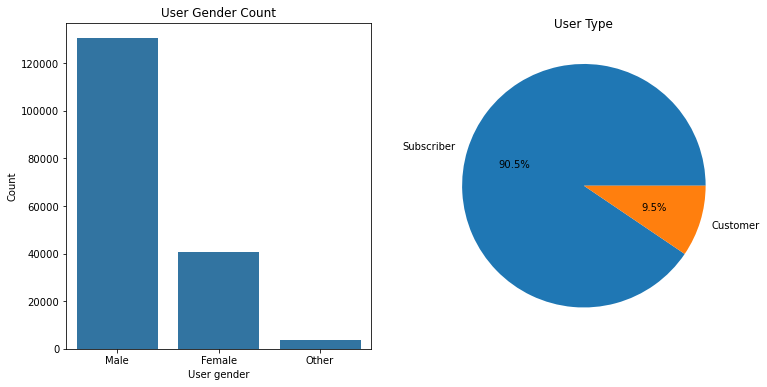

In [43]:
# plotting the gender of the users
plt.figure(figsize=[12, 6]);

plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'member_gender', color = base_color, order = ['Male', 'Female', 'Other'] )
plt.title('User Gender Count')
plt.xlabel('User gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
b = df['user_type'].value_counts()
plt.pie(b, labels = b.index, autopct='%1.1f%%')
plt.title('User Type');

## User's Age And Trip Duration Distributions

> From the age distribution, Most of the user's age is between 20 and 40 years old and From the trip duration most of the duration lay between 3 and 20 minutes

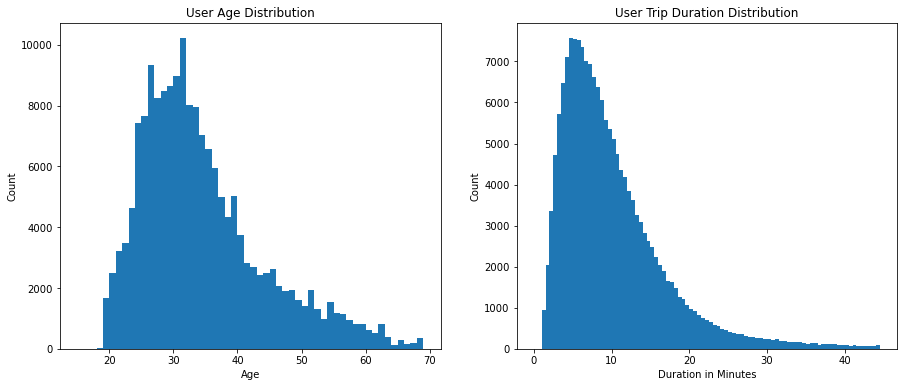

In [52]:
plt.figure(figsize=[15, 6]);
plt.subplot(1, 2, 1)
bins = np.arange(15, 70, 1)
plt.hist(data = df, x = 'user_age', bins = bins)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
bins1 = np.arange(0, 45, 0.5)
plt.hist(data = df, x = 'duration_min', bins = bins1)
plt.title('User Trip Duration Distribution')
plt.xlabel('Duration in Minutes')
plt.ylabel('Count');

## Relation between age and trip duration

> we can see that the younger the users the longer the trip duration will be

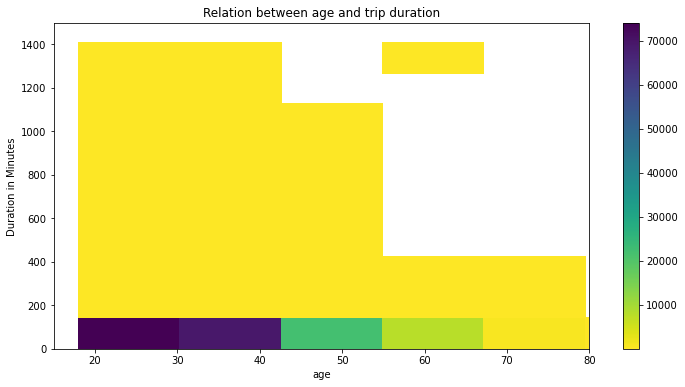

In [26]:
plt.figure(figsize = [12, 6])
plt.hist2d(data = df, x = 'user_age', y = 'duration_min', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Relation between age and trip duration')
plt.xlabel('age')
plt.ylabel('Duration in Minutes')
plt.axis([15, 80, 0, 1500]);

## Relation between weekdays and trip duration

> On weekends longer trip duration increases

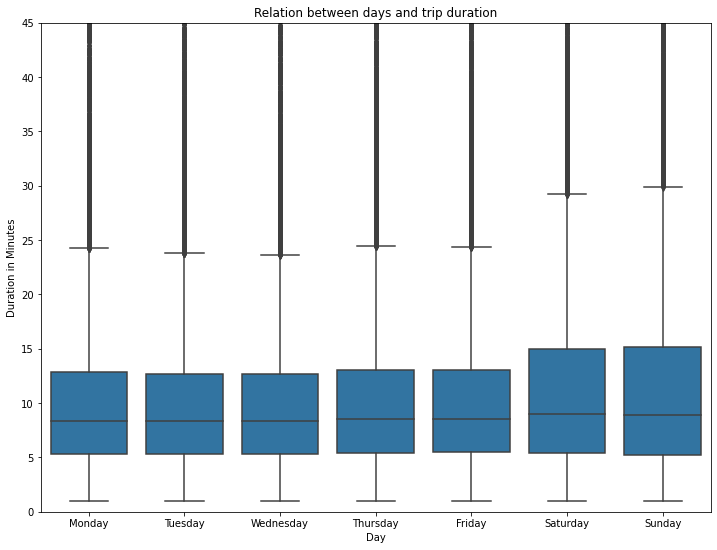

In [32]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [12, 9])
sb.boxplot(data = df, x = 'start_day', y = 'duration_min', color=base_color, 
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim([0, 45])
plt.title('Relation between days and trip duration')
plt.xlabel('Day')
plt.ylabel('Duration in Minutes');

## Relation between age, trip duration and user type

> younger subscriber users have longer trip than customer user

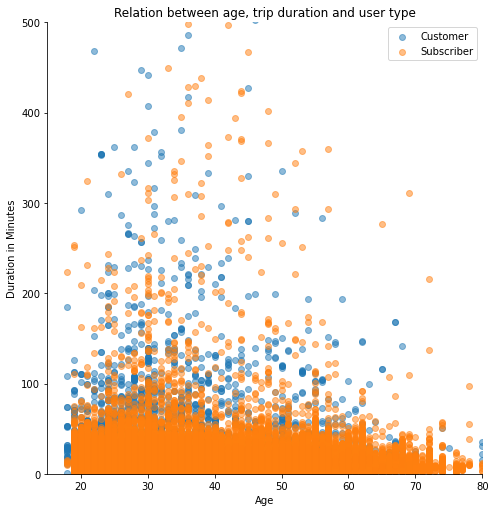

In [54]:
# plotting relation between user type, age and trip duration
g = sb.FacetGrid(data = df, hue = 'user_type', size = 7)
g.map(plt.scatter, 'user_age','duration_min', alpha = 0.5)
plt.axis([15, 80, 0, 500])
plt.legend()
plt.title('Relation between age, trip duration and user type')
plt.xlabel('Age')
plt.ylabel('Duration in Minutes');